In [1]:
from google.colab import files
uploaded = files.upload()

Saving Соцстатистика.csv to Соцстатистика.csv


In [2]:
import pandas as pd, numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings; warnings.filterwarnings("ignore")

In [3]:
DATA_PATH = "Соцстатистика.csv"
df = pd.read_csv(DATA_PATH)

In [4]:
print(df.columns.tolist())

['Country', 'Year', 'ecommerce', 'Internet_Penetration', 'GDP_per_Capita', 'GDP_Total', 'EGDI', 'Digitalmarketing', 'Users_social', 'Users_social_per', 'Telecommunications_computer_and_information_services']


In [7]:
df.columns = df.columns.str.lower().str.replace('[%$]', '', regex=True)

df['internet_penetration'] = df['internet_penetration'].astype(str).str.replace(',', '.').str.replace('%', '').str.strip()
df['internet_penetration'] = pd.to_numeric(df['internet_penetration'], errors='coerce')

df['gdp_per_capita'] = df['gdp_per_capita'].astype(str).str.replace(',', '.').str.replace('$', '').str.strip()
df['gdp_per_capita'] = pd.to_numeric(df['gdp_per_capita'], errors='coerce')

df['gdp_total'] = df['gdp_total'].astype(str).str.replace(',', '.').str.replace('$', '').str.strip()
df['gdp_total'] = pd.to_numeric(df['gdp_total'], errors='coerce')

# Названия столбцов для массовой конвертации в числовой тип
cols_numeric = ['ecommerce', 'internet_penetration', 'gdp_per_capita', 'gdp_total', 'egdi',
                'digitalmarketing', 'users_social', 'users_social_per', 'telecommunications_computer_and_information_services']

for col in cols_numeric:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
display(HTML("<h3>Форма датасета</h3>"))
display(pd.DataFrame({"Строк": [df.shape[0]],
                      "Столбцов": [df.shape[1]]}))

,Строк,Столбцов
0,2120,11


In [9]:
display(HTML("<h3>Типы данных по столбцам</h3>"))
display(df.dtypes.to_frame("Тип"))

,Тип
country,object
year,int64
ecommerce,float64
internet_penetration,float64
gdp_per_capita,float64
gdp_total,float64
egdi,float64
digitalmarketing,float64
users_social,float64
users_social_per,float64


In [10]:
display(HTML("<h3>Первые 3 строки</h3>"))
display(df.head(3))

,country,year,ecommerce,internet_penetration,gdp_per_capita,gdp_total,egdi,digitalmarketing,users_social,users_social_per,telecommunications_computer_and_information_services
0,Afghanistan,2015,NaN,0.0826,565.569730,19.13,NaN,NaN,NaN,NaN,0.13453
1,Afghanistan,2016,NaN,0.1100,522.082216,18.12,0.23132,NaN,NaN,NaN,0.12147
2,Afghanistan,2017,NaN,0.1350,525.469771,18.75,NaN,NaN,NaN,NaN,0.08918


In [11]:
missing = df.isnull().sum()
display(HTML("<h3>Пропуски по столбцам</h3>"))
display(missing)

,0
country,0
year,0
ecommerce,358
internet_penetration,414
gdp_per_capita,88
gdp_total,67
egdi,1400
digitalmarketing,960
users_social,1556
users_social_per,1556


In [14]:
display(HTML("<h3>Пропуски по столбцам</h3>"))
display(missing)

,0
country,0
year,0
ecommerce,358
internet_penetration,414
gdp_per_capita,88
gdp_total,67
egdi,1400
digitalmarketing,960
users_social,1556
users_social_per,1556


In [16]:
display(HTML("<h3>Число уникальных значений</h3>"))
display(
    df.nunique(dropna=True)
      .sort_values(ascending=False)
      .to_frame("Уникальных")
)

,Уникальных
gdp_per_capita,2032
gdp_total,1605
internet_penetration,1604
telecommunications_computer_and_information_services,1595
ecommerce,1323
digitalmarketing,1066
egdi,702
users_social,402
users_social_per,360
country,212


In [17]:
# --- Разделение на числовые и категориальные ---
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

display(HTML("<h3>Типизация признаков</h3>"))
display(pd.DataFrame({
    "Числовые столбцы": [", ".join(num_cols) if num_cols else "—"],
    "Категориальные/текстовые столбцы": [", ".join(cat_cols) if cat_cols else "—"]
}))

,Числовые столбцы,Категориальные/текстовые столбцы
0,"year, ecommerce, internet_penetration, gdp_per...",country


In [18]:
mem = df.memory_usage(deep=True)
examples = df.astype(str).apply(
    lambda s: s.dropna().iloc[0] if s.dropna().shape[0] else "—"
)

In [19]:
tech_profile = pd.DataFrame({
    "Тип": df.dtypes.astype(str),
    "Не-NaN": df.notna().sum(),
    "Пропусков": df.isna().sum(),
    "Пропуски, %": (df.isna().mean()*100).round(2),
    "Уникальных": df.nunique(dropna=True),
    "Память, байт": mem,
    "Пример значения": examples
}).sort_values(["Пропуски, %","Уникальных"],
               ascending=[False, False])

In [20]:
display(HTML("<h3>Технический профиль столбцов</h3>"))
display(tech_profile)

,Тип,Не-NaN,Пропусков,"Пропуски, %",Уникальных,"Память, байт",Пример значения
users_social,float64,564.0,1556.0,73.40,402.0,16960,nan
users_social_per,float64,564.0,1556.0,73.40,360.0,16960,nan
egdi,float64,720.0,1400.0,66.04,702.0,16960,nan
digitalmarketing,float64,1160.0,960.0,45.28,1066.0,16960,nan
telecommunications_computer_and_information_services,float64,1638.0,482.0,22.74,1595.0,16960,0.13453
internet_penetration,float64,1706.0,414.0,19.53,1604.0,16960,0.0826
ecommerce,float64,1762.0,358.0,16.89,1323.0,16960,nan
gdp_per_capita,float64,2032.0,88.0,4.15,2032.0,16960,565.5697304
gdp_total,float64,2053.0,67.0,3.16,1605.0,16960,19.13
country,object,2120.0,0.0,0.00,212.0,123900,Afghanistan


In [21]:
if num_cols:
    desc_num = df[num_cols].describe(percentiles=[.05,.25,.5,.75,.95]).T
    desc_num["IQR"] = desc_num["75%"] - desc_num["25%"]
    desc_num["Асимметрия"] = df[num_cols].skew()
    desc_num["Эксцесс"] = df[num_cols].kurt()
    display(HTML("<h3>Описательная статистика (числовые)</h3>"))
    display(desc_num.round(4))

if cat_cols:
    top_rows = []
    for c in cat_cols:
        vc = df[c].value_counts(dropna=True)
        if vc.shape[0] > 0:
            top = str(vc.index[0]);
            cnt = int(vc.iloc[0]);
            pct = round(cnt/len(df)*100, 2)
            top_rows.append({"Столбец": c,
                              "Топ категория": top,
                              "Частота": cnt,
                              "Доля, %": pct,
                              "Уникальных": int(df[c].nunique(dropna=True))})

    if top_rows:
        top_table = pd.DataFrame(top_rows).sort_values("Доля, %", ascending=False)
        display(HTML("<h3>Категориальные: доминирующие категории</h3>"))
        display(top_table)

,count,mean,std,min,5%,25%,50%,75%,95%,max,IQR,Асимметрия,Эксцесс
year,2120.0,2019.5000,2.8730,2015.0000,2015.0000,2017.0000,2019.5000,2022.0000,2024.0000,2024.0000,5.0000,0.0000,-1.2243
ecommerce,1762.0,31.2506,208.2101,0.0001,0.0039,0.1138,0.8141,7.5800,91.6100,3618.5400,7.4662,12.6357,177.9624
internet_penetration,1706.0,0.6111,0.2821,0.0108,0.1102,0.3731,0.6865,0.8504,0.9706,1.0000,0.4774,-0.4848,-1.0444
gdp_per_capita,2032.0,18493.9698,27672.3291,153.9302,646.2873,2358.8033,6911.7654,23500.7064,69025.2284,256580.5151,21141.9031,3.2161,14.6846
gdp_total,2053.0,430.6028,2005.4150,0.0000,0.3760,6.4300,28.7000,185.0000,1702.0000,29200.0000,178.5700,9.5032,101.5873
egdi,720.0,0.5839,0.2229,0.0270,0.2316,0.4121,0.5824,0.7798,0.9016,0.9847,0.3678,-0.1762,-1.0340
digitalmarketing,1160.0,3.8358,19.1109,0.0000,0.0085,0.1040,0.4400,1.6027,12.0554,361.0000,1.4986,11.7517,168.6078
users_social,564.0,0.0522,0.1553,0.0004,0.0011,0.0038,0.0077,0.0336,0.1743,1.1400,0.0298,5.1222,27.3089
users_social_per,564.0,0.6283,0.2009,0.0380,0.2090,0.5500,0.6695,0.7492,0.8578,2.1800,0.1992,0.1183,7.6171
telecommunications_computer_and_information_services,1638.0,7.1543,22.4817,0.0000,0.0079,0.0641,0.3292,3.2128,37.0969,316.4664,3.1487,6.3813,55.1966


,Столбец,Топ категория,Частота,"Доля, %",Уникальных
0,country,Afghanistan,10,0.47,212


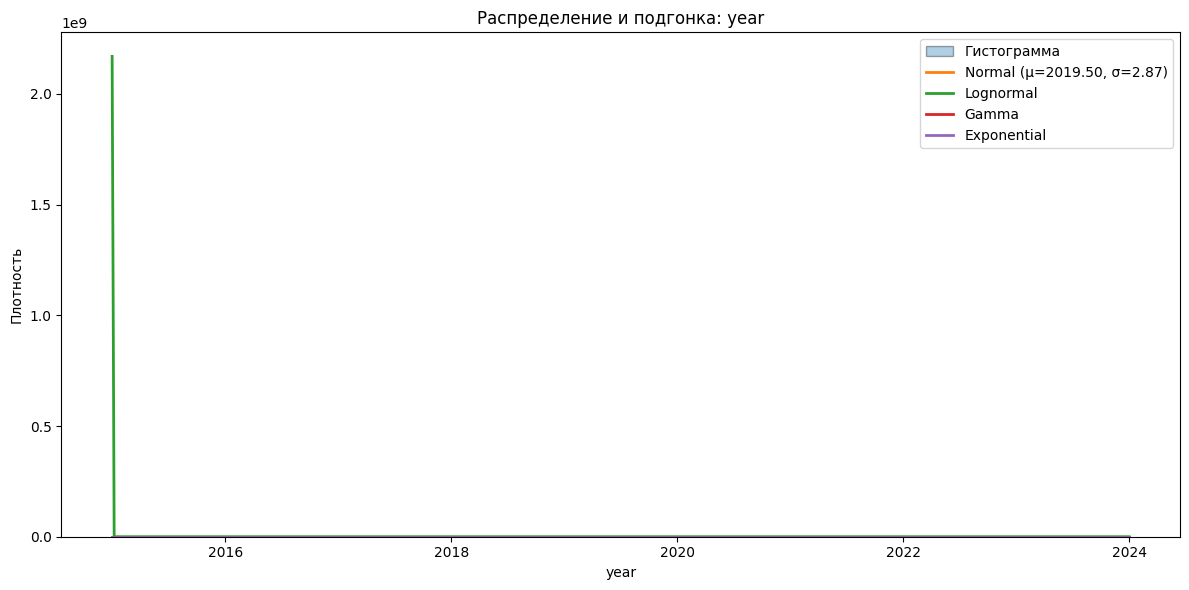

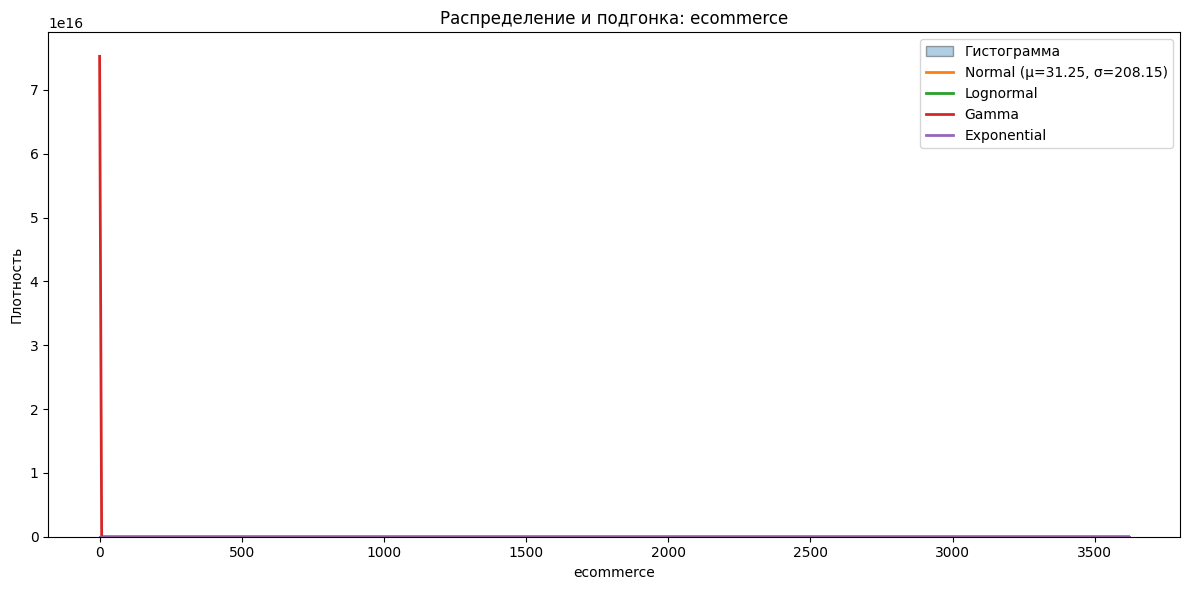

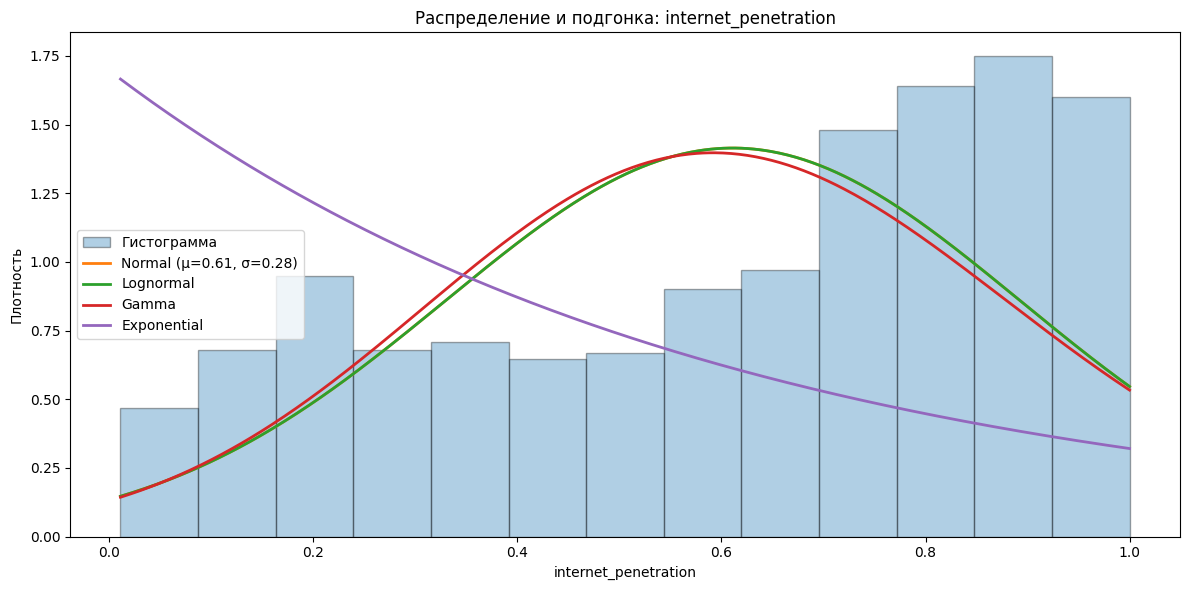

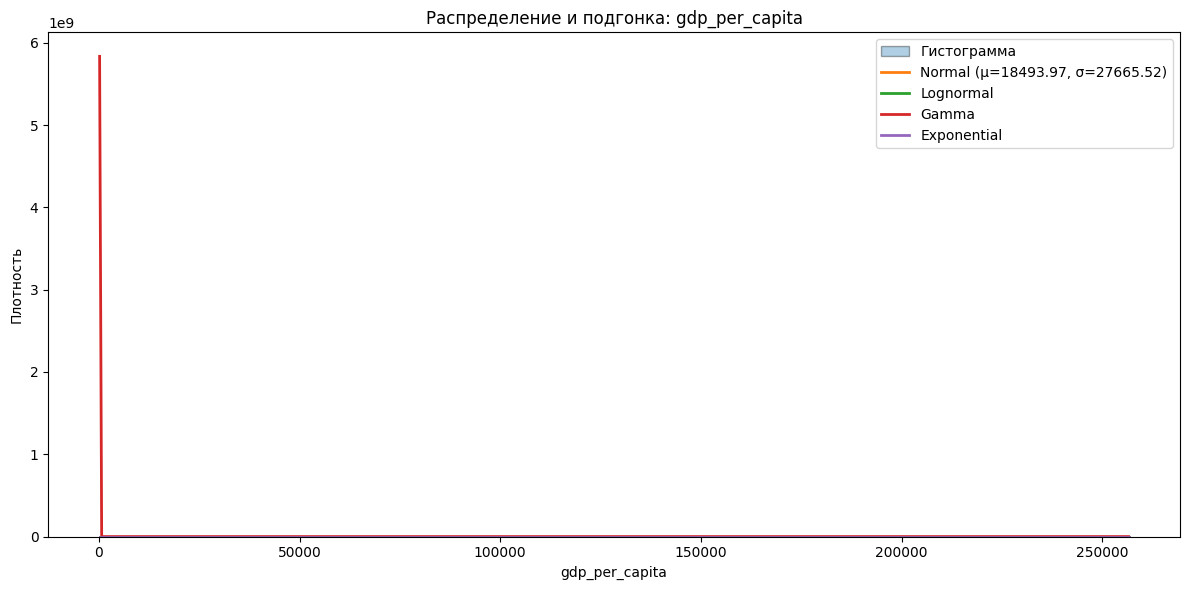

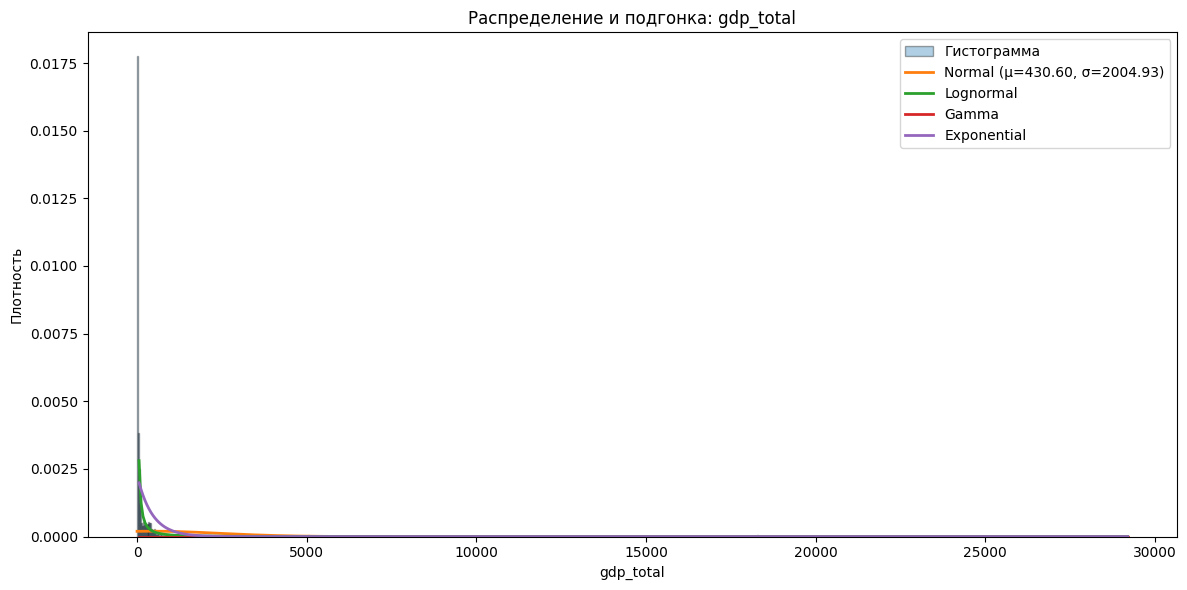

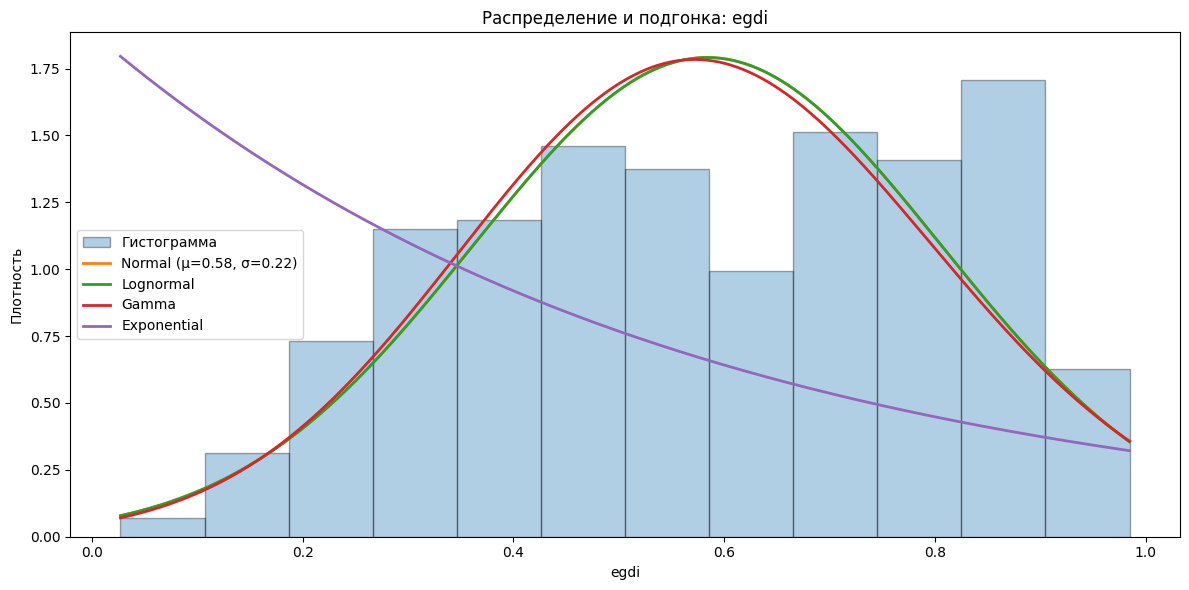

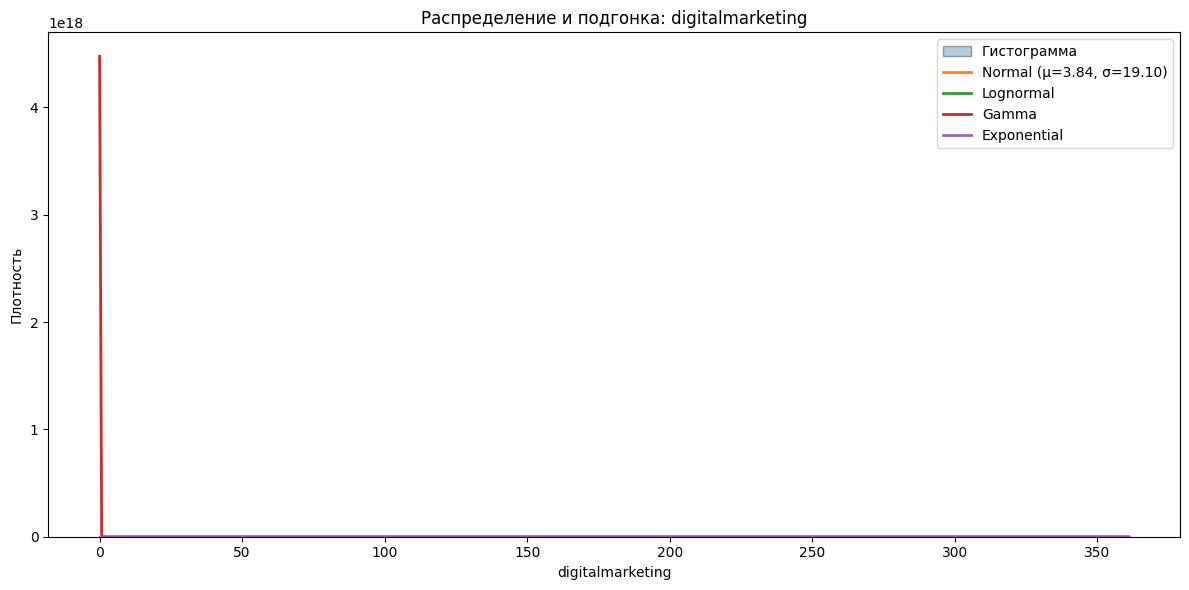

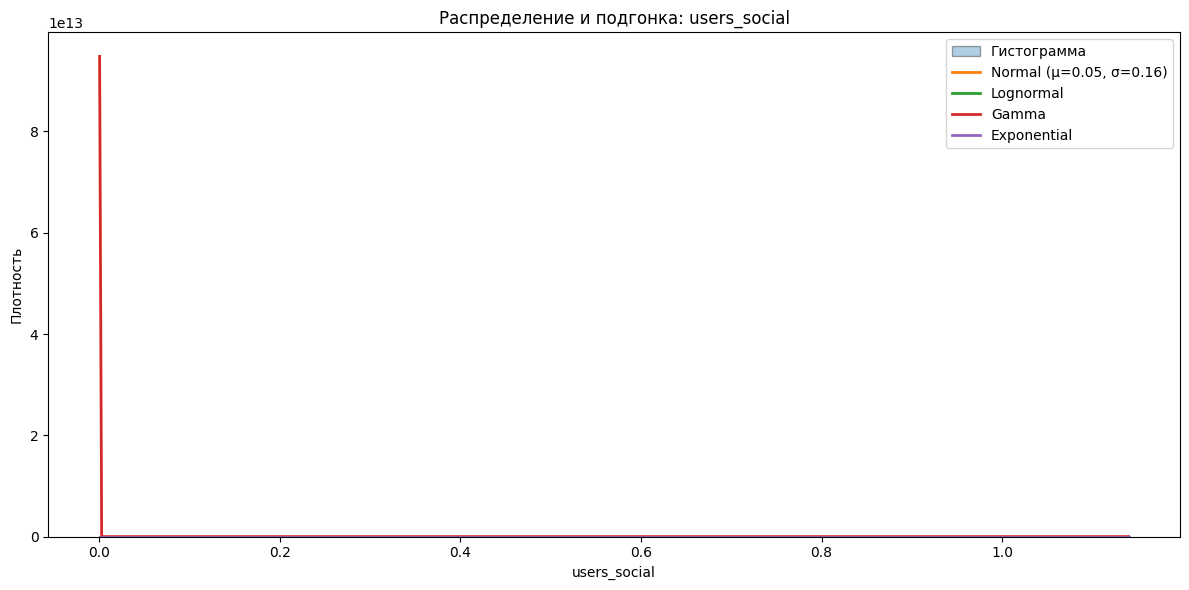

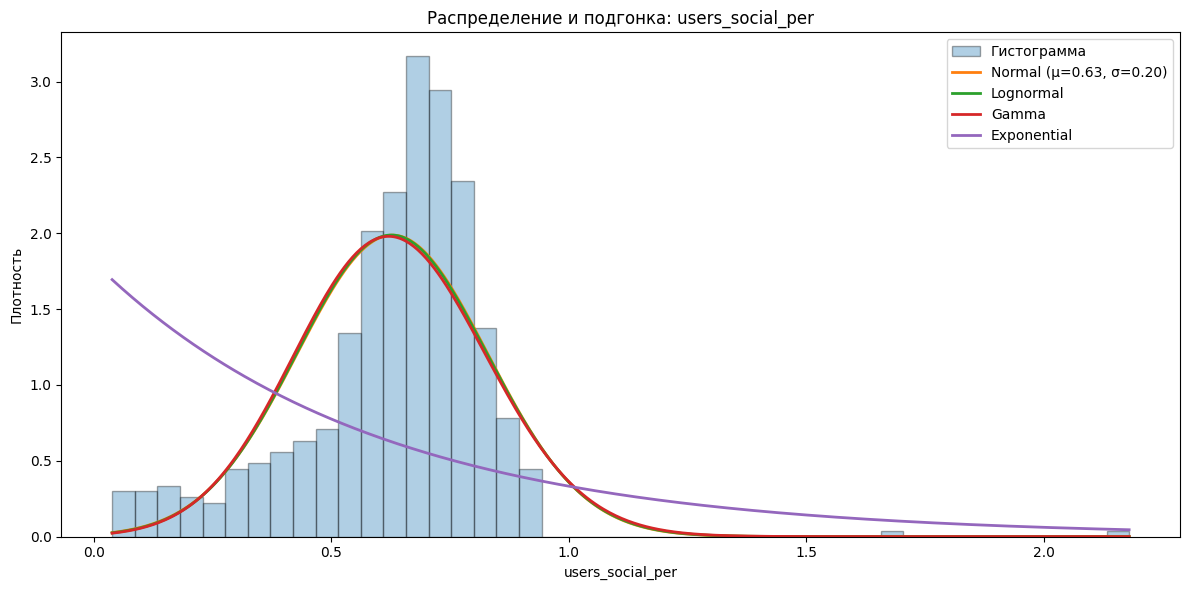

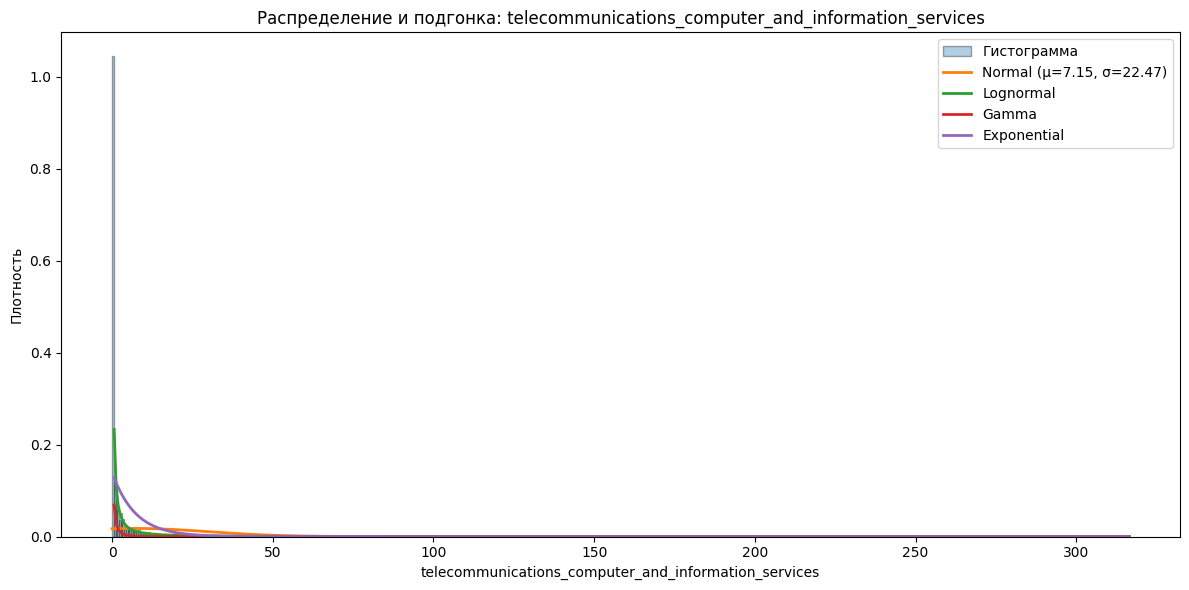

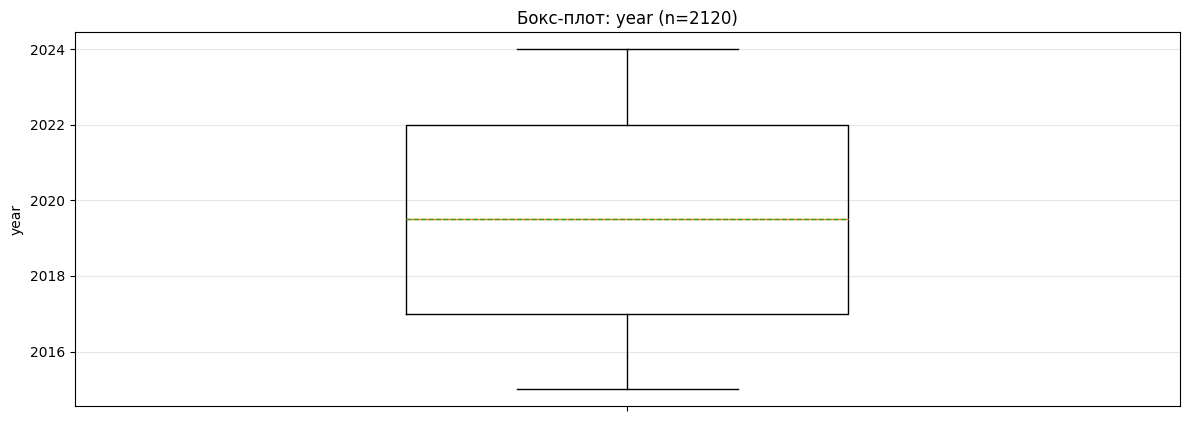

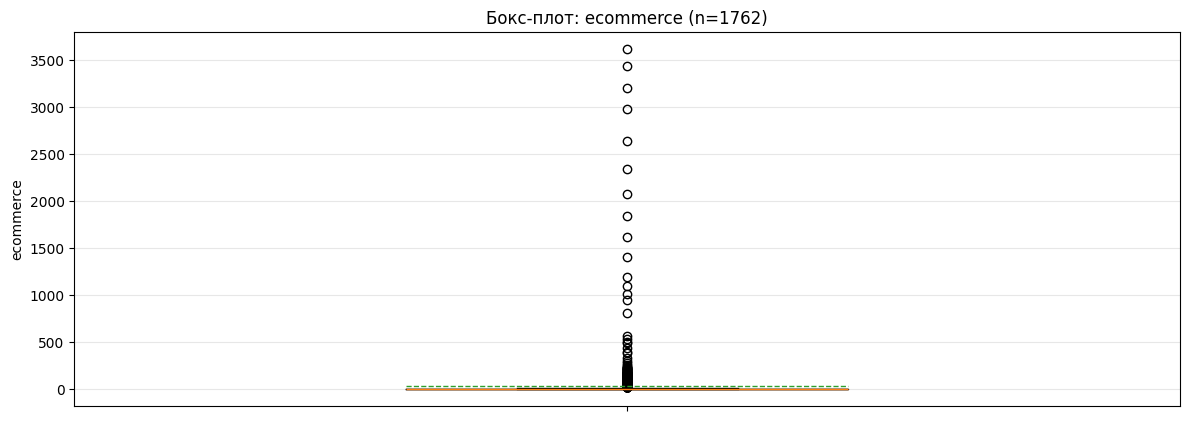

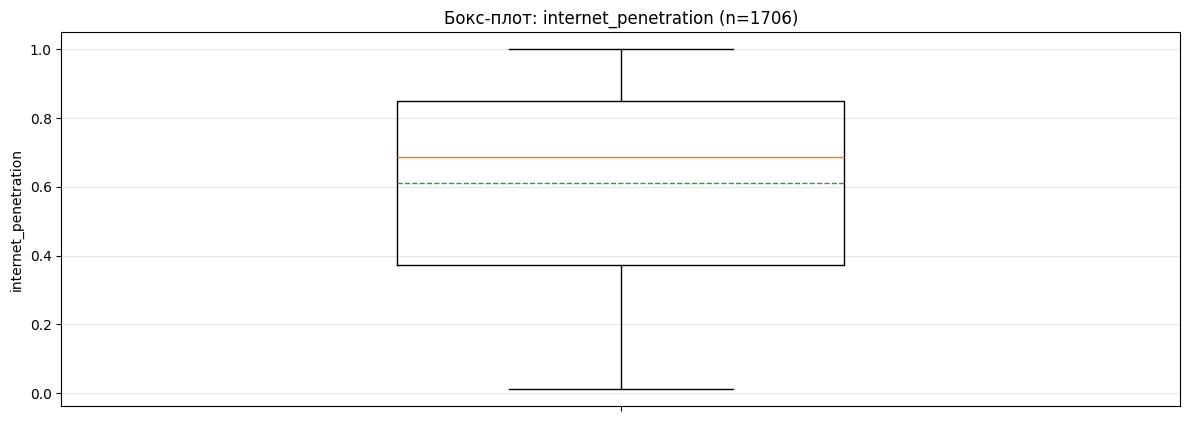

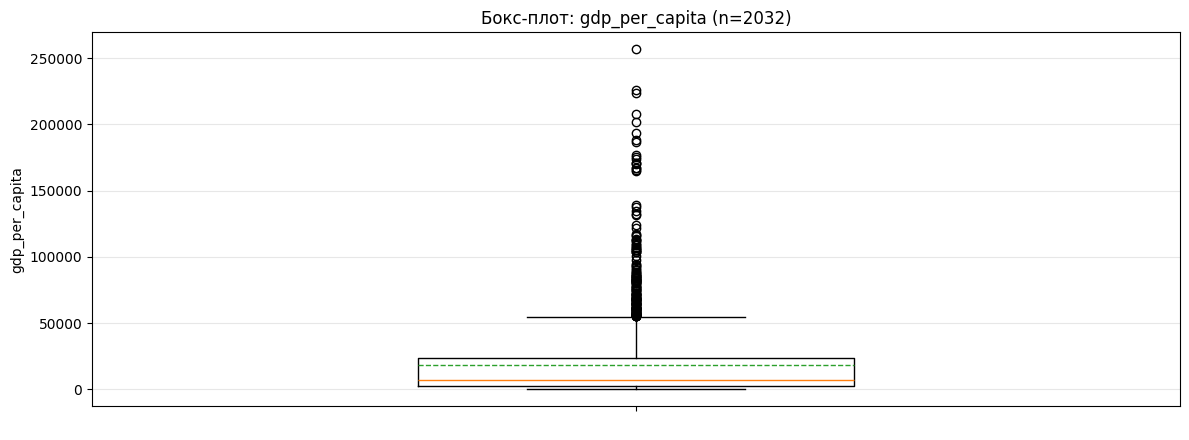

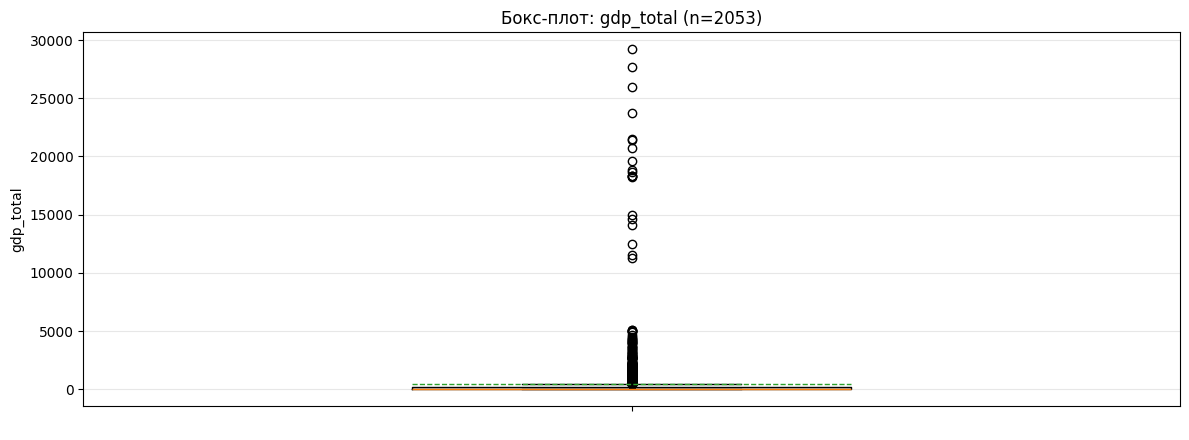

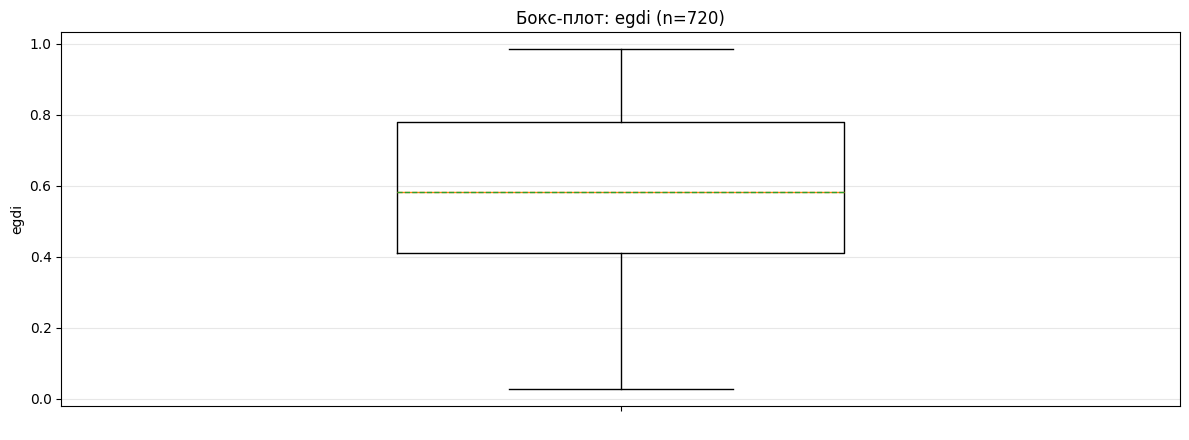

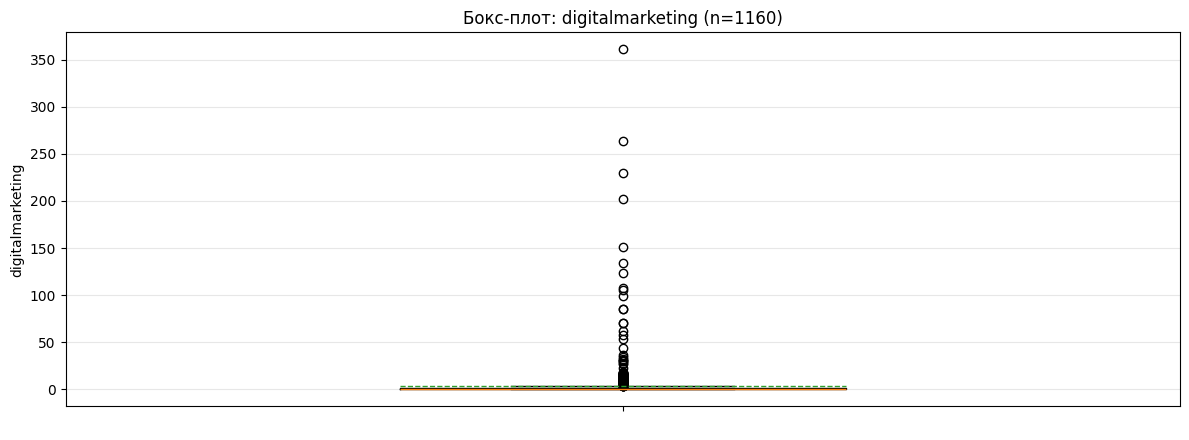

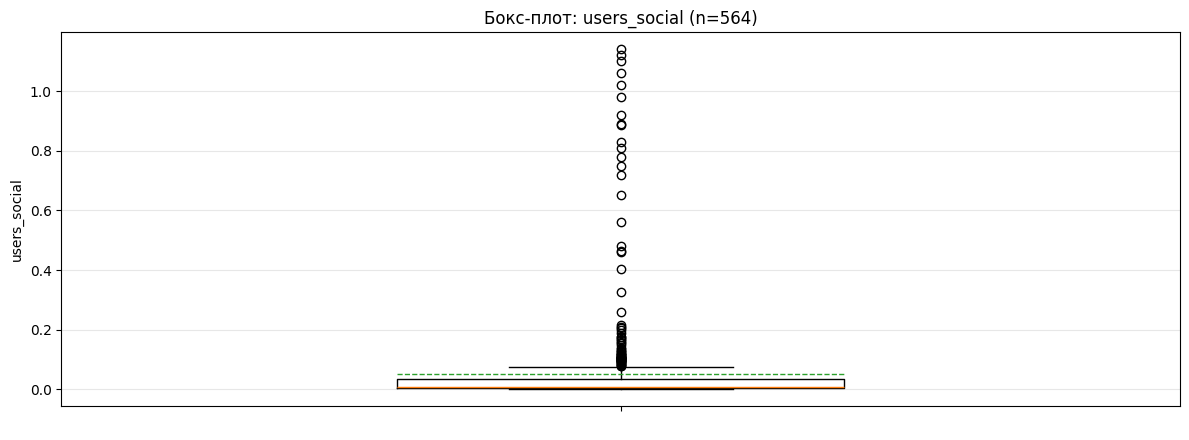

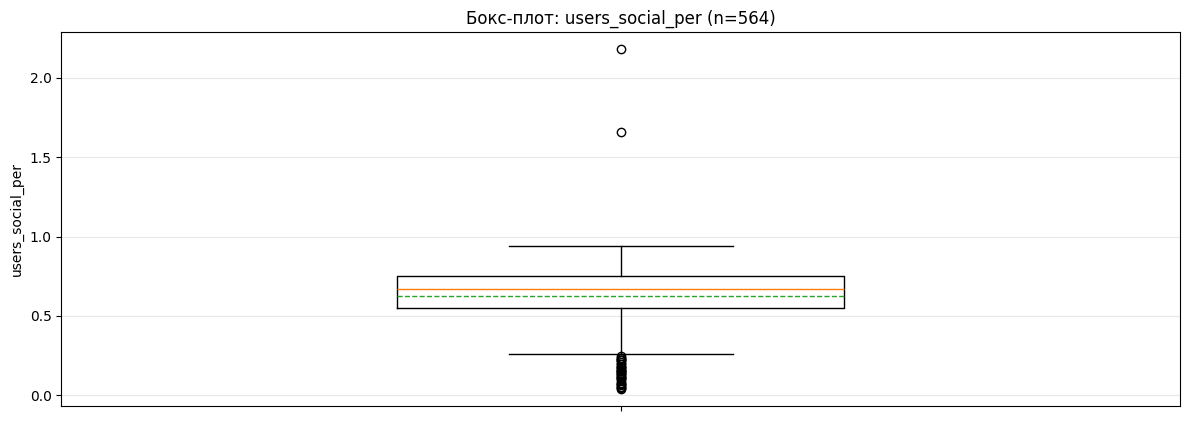

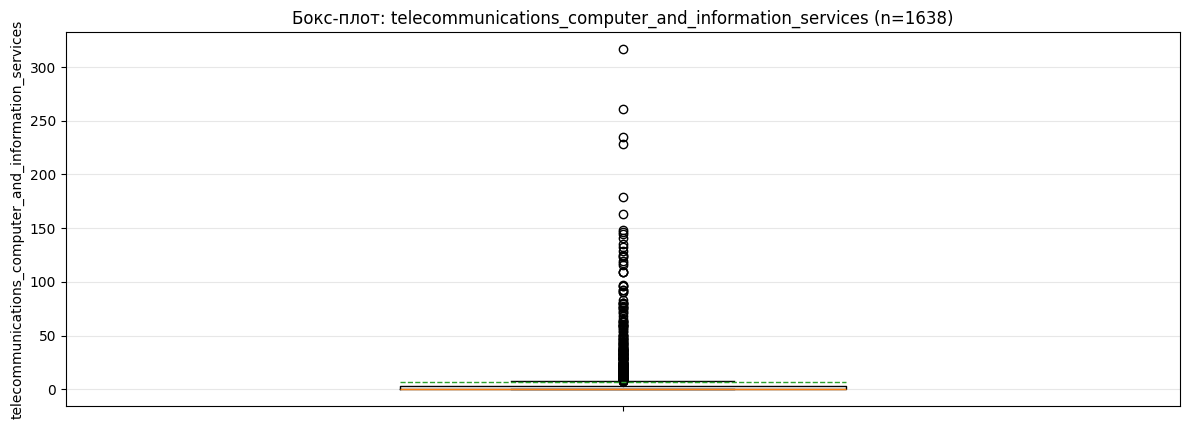

In [22]:
num_cols = df.select_dtypes(include=np.number).columns.tolist() if 'num_cols' not in locals() else num_cols


for c in num_cols:
    x = df[c].dropna().values
    if x.size == 0:
        continue

    x_min, x_max = np.min(x), np.max(x)
    if x_min == x_max:
        x_min, x_max = x_min - 1, x_max + 1

    grid = np.linspace(x_min, x_max, 500)
    plt.figure(figsize=(12, 6))

    plt.hist(x, bins="auto", density=True, alpha=.35, edgecolor="k", label="Гистограмма")

    # ---- Нормальное распределение (Normal) ----
    try:
        m, s = stats.norm.fit(x)
        if np.isfinite(s) and s > 0:
            plt.plot(grid, stats.norm.pdf(grid, m, s), lw=2,
                     label=f"Normal (μ={m:.2f}, σ={s:.2f})")
    except Exception as e:
        pass

    # ---- Распределения для положительных значений: Lognormal / Gamma / Exponential ----
    xp = x[x > 0]
    grid_pos = grid[grid > 0]
    if xp.size > 0 and grid_pos.size > 0:
        # Lognormal
        try:
            sh, lo, sc = stats.lognorm.fit(xp)
            plt.plot(grid_pos, stats.lognorm.pdf(grid_pos, sh, lo, sc), lw=2,
                     label="Lognormal")
        except Exception as e:
            pass

        # Gamma
        try:
            a, lo, sc = stats.gamma.fit(xp)
            plt.plot(grid_pos, stats.gamma.pdf(grid_pos, a, lo, sc), lw=2,
                     label="Gamma")
        except Exception as e:
            pass

        # Exponential
        try:
            lo, sc = stats.expon.fit(xp)
            plt.plot(grid_pos, stats.expon.pdf(grid_pos, lo, sc), lw=2,
                     label="Exponential")
        except Exception as e:
            pass

    plt.title(f"Распределение и подгонка: {c}")
    plt.xlabel(c)
    plt.ylabel("Плотность")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Отдельные БОКС-ПЛОТЫ по каждой числовой переменной ---
for c in num_cols:
    v = df[c].dropna()
    if v.size == 0:
        continue
    plt.figure(figsize=(12, 4.5))
    plt.boxplot(v, vert=True, showmeans=True, meanline=True,
                whis=1.5, widths=0.4)
    plt.title(f"Бокс-плот: {c} (n={len(v)})")
    plt.ylabel(c)
    plt.xticks([1], [" "])
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

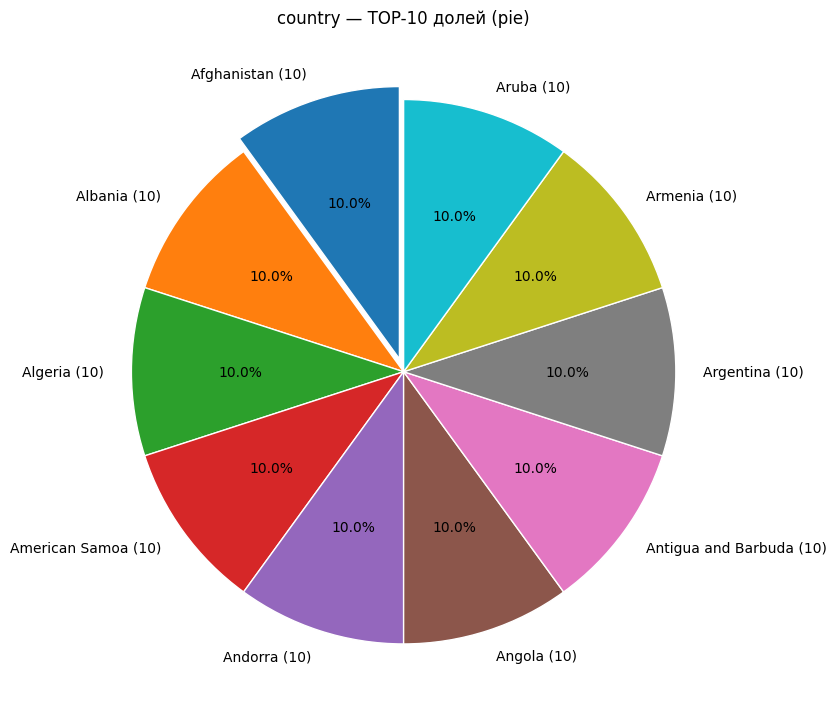

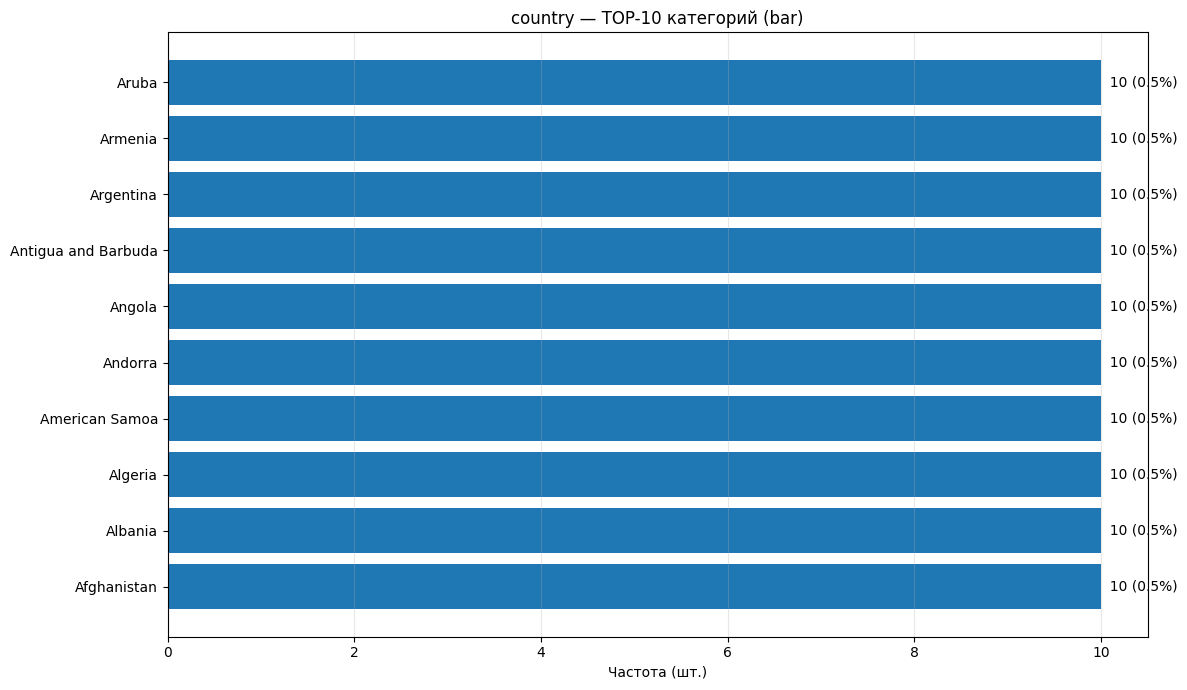

In [23]:
cat_cols = [c for c in df.columns if c not in df.select_dtypes(include=np.number).columns] if 'cat_cols' not in locals() else cat_cols  # берём все нечисловые столбцы


for c in cat_cols:
    vc = df[c].value_counts(dropna=True).head(10)
    if vc.empty:
        continue

    labels = vc.index.astype(str).tolist()
    counts = vc.values
    pcts = (vc.values / len(df) * 100)

    # ------------ 1) КРУГОВАЯ ДИАГРАММА (PIE) ------------
    plt.figure(figsize=(8.5, 8.5))
    labels_with_counts = [f"{lab} ({cnt})" for lab, cnt in zip(labels, counts)]
    explode = [0.05] + [0]*(len(counts)-1)
    plt.pie(counts,
            labels=labels_with_counts,
            autopct="%1.1f%%",
            startangle=90,
            explode=explode,
            wedgeprops={"linewidth": 1, "edgecolor": "white"})
    plt.gca().set_aspect('equal')
    plt.title(f"{c} — TOP-10 долей (pie)")
    plt.tight_layout()
    plt.show()

    # ------------ 2) ГОРИЗОНТАЛЬНАЯ СТОЛБЧАТАЯ ДИАГРАММА (BARH) ------------
    order = np.argsort(counts)
    counts_sorted = counts[order]
    pcts_sorted = pcts[order]
    labels_sorted = [labels[i] for i in order]

    plt.figure(figsize=(12, 7))
    y_pos = np.arange(len(labels_sorted))
    plt.barh(y_pos, counts_sorted)
    plt.yticks(y_pos, labels_sorted)
    plt.xlabel("Частота (шт.)")
    plt.title(f"{c} — TOP-10 категорий (bar)")

    # наносим подписи с числом и процентом справа от каждого столбца
    for i, (val, pct) in enumerate(zip(counts_sorted, pcts_sorted)):
        plt.text(val, i, f"  {val} ({pct:.1f}%)", va="center")

    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()